In [ ]:
# F2,F3,F4에 대해서 Z-score 계산
# country별로 z-score 계산
# country & Sector별로 z-score 계산
# f2, f3, f4의 합산 z-score (배우지 않은 것)
# f2, f3, f4의 가중합산 z-score (배우지 않은 것)
# f2, f3, f4의 조건부 가중합산 z-score (배우지 않은 것)
# country별로 구한 값과 country & sector 별로 구한 값의 상관관계 
# Industry별 총합
# 에러가 났으면 그대로 둘 것.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Cross-Sectional Analysis - Sample data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        2370 non-null   object 
 1   Company_Name  2370 non-null   object 
 2   Country       2370 non-null   object 
 3   Sector        2370 non-null   object 
 4   Industry      2370 non-null   object 
 5   F1            2369 non-null   object 
 6   F2            2366 non-null   float64
 7   F3            2366 non-null   float64
 8   F4            2083 non-null   object 
dtypes: float64(2), object(7)
memory usage: 166.8+ KB


In [18]:
# object인 F1을 float으로 변경

# object -> float 변경 로직 정의
def process_number(data):
    return float(data.replace(',',''))

# F1을 str으로 변경 후, 로직 적용
df['F1'] = df['F1'].astype(str)
df['F1'] = df['F1'].apply(process_number)

df['F4'] = df['F4'].astype(str)
df['F4'] = df['F4'].apply(process_number)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        2370 non-null   object 
 1   Company_Name  2370 non-null   object 
 2   Country       2370 non-null   object 
 3   Sector        2370 non-null   object 
 4   Industry      2370 non-null   object 
 5   F1            2369 non-null   float64
 6   F2            2366 non-null   float64
 7   F3            2366 non-null   float64
 8   F4            2083 non-null   float64
 9   (F1, F2, F3)  2369 non-null   float64
dtypes: float64(5), object(5)
memory usage: 185.3+ KB


In [59]:
# 국가별 시총 합 계산
result = (
    df
    .groupby(['Country'])
    ['F1'].sum()
    .to_frame()
)

In [60]:
result[1:6]

,F1
Country,
Australia,1237212.3
Austria,69890.9
Belgium,225436.9
Bermuda,54336.6
Brazil,649994.8


In [61]:
merged_result = pd.merge(df, result, on = ['Country'])
merged_result.rename({
    'F1_x': 'F1',
    'F1_y': 'Country_sum_of_F1'
}, axis = 1)

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4,"(F1, F2, F3)",F1_rank_pct,Country_sum_of_F1
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,5365.9,0.1,0.0,NaN,5365.9,0.802448,36157878.2
1,259570,3M Company,United States,Industrials,Industrial Conglomerates,84749.9,0.2,4.0,6.8,84749.9,0.059941,36157878.2
2,281602,A. O. Smith Corporation,United States,Industrials,Building Products,9012.5,0.2,1.9,9.6,9012.5,0.617138,36157878.2
3,200230,Abbott Laboratories,United States,Health Care,Health Care Equipment & Supplies,197401.2,0.2,1.7,45.1,197401.2,0.019417,36157878.2
4,B92SR7,"AbbVie, Inc.",United States,Health Care,Biotechnology,269360.6,0.1,3.7,19.7,269360.6,0.011819,36157878.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2365,BD4T6W,PT Telkom Indonesia (Persero) Tbk Class B,Indonesia,Communication Services,Diversified Telecommunication Services,28308.3,0.3,4.0,8.1,28308.3,0.236387,284010.8
2366,B4MW04,PT Tower Bersama Infrastructure Tbk,Indonesia,Communication Services,Diversified Telecommunication Services,4367.6,0.1,1.1,32.4,4367.6,0.861123,284010.8
2367,668718,PT Unilever Indonesia Tbk,Indonesia,Consumer Staples,Household Products,12636.8,0.0,3.3,-12.4,12636.8,0.491347,284010.8
2368,623084,PT United Tractors Tbk,Indonesia,Energy,Oil Gas & Consumable Fuels,7589.4,0.7,4.1,-8.6,7589.4,0.686788,284010.8


In [62]:
df['F1_rank_pct'] = df['F1'].rank(ascending = False, pct = True)

In [63]:
df

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4,"(F1, F2, F3)",F1_rank_pct
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,5365.9,0.1,0.0,NaN,5365.9,0.802448
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,2147.2,1.1,3.8,103.1,2147.2,0.978472
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,14320.7,0.9,3.5,16.1,14320.7,0.447868
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,84749.9,0.2,4.0,6.8,84749.9,0.059941
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,1746.6,1.1,3.5,5.2,1746.6,0.987759
...,...,...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,6911.6,1.3,8.2,47.8,6911.6,0.719713
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,6286.9,0.1,2.2,38.5,6286.9,0.751372
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,18071.6,0.0,0.0,NaN,18071.6,0.369776
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,15444.2,0.5,2.3,NaN,15444.2,0.422963


In [64]:
import seaborn as SNS

<AxesSubplot:xlabel='F1_rank_pct', ylabel='Count'>

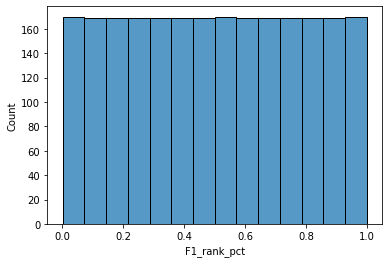

In [65]:
SNS.histplot(df, x='F1_rank_pct')

In [66]:
result1 = (
    df[df['F1_rank_pct'] <= 0.8]
    .groupby(['Country'])
    ['F1'].sum()
    .to_frame()
)

In [67]:
result1[:5]

,F1
Country,
Australia,1208406.0
Austria,60767.6
Belgium,221016.4
Bermuda,54336.6
Brazil,584108.6


In [68]:
merged_result = pd.merge(df, result1, on = ['Country'], how = 'left')

In [69]:
merged_result

,Symbol,Company_Name,Country,Sector,Industry,F1_x,F2,F3,F4,"(F1, F2, F3)",F1_rank_pct,F1_y
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,5365.9,0.1,0.0,NaN,5365.9,0.802448,36110839.6
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,2147.2,1.1,3.8,103.1,2147.2,0.978472,4090408.8
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,14320.7,0.9,3.5,16.1,14320.7,0.447868,2532355.2
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,84749.9,0.2,4.0,6.8,84749.9,0.059941,36110839.6
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,1746.6,1.1,3.5,5.2,1746.6,0.987759,4090408.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,6911.6,1.3,8.2,47.8,6911.6,0.719713,4090408.8
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,6286.9,0.1,2.2,38.5,6286.9,0.751372,4007234.9
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,18071.6,0.0,0.0,NaN,18071.6,0.369776,36110839.6
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,15444.2,0.5,2.3,NaN,15444.2,0.422963,4090408.8
